# 第四章 机器学习模型

## 1.1逻辑斯谛回归模型

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [2]:
# 生成测试数据
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=14, n_clusters_per_class=1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 创建逻辑回归模型
model = LogisticRegression()

In [4]:
# 训练模型
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# 进行预测
y_pred = model.predict(X_test)

In [6]:
# 打印分类报告
print(classification_report(y_test, y_pred))

# 打印模型系数
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Model coefficients: [[ 0.83768057 -2.16092246]]
Model intercept: [1.01354718]


## 1.2 决策树

以sklearn的决策树模型为例 

In [7]:
# 导入必要的库
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
# 生成一个简单的测试数据集
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 创建决策树模型
dtree = DecisionTreeClassifier(random_state=42)

In [10]:
# 训练模型
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# 预测测试集结果
y_pred = dtree.predict(X_test)

In [12]:
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.95


In [13]:
# 可视化决策树（需要安装 graphviz 和 python-graphviz）
from sklearn.tree import export_graphviz
import graphviz

# 导出决策树为DOT格式
dot_data = export_graphviz(dtree, out_file=None, feature_names=['Feature1', 'Feature2', 'Feature3', 'Feature4'],
                           class_names=['Class0', 'Class1'], filled=True, rounded=True, special_characters=True)

# 通过graphviz生成决策树图形
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

## 1.3 Adaboost

In [20]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
# 生成测试数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# 创建Adaboost模型实例
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

In [23]:
# 训练模型
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [24]:
# 预测测试集
predictions = adaboost.predict(X_test)

In [25]:
# 评估模型
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 90.33%


## 1.4 GBDT模型

In [26]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
# 生成模拟数据集
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 创建GBDT模型
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [29]:
# 训练模型
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [30]:
# 预测测试集
y_pred = gbdt.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率：{accuracy:.2f}')

模型准确率：0.96


## 1.5 XGBoost模型

In [33]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [32]:
# 生成分类数据集
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 将数据转换为DMatrix对象，这是XGBoost的优化数据结构
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [35]:
# 设置XGBoost的参数
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

In [36]:
# 训练模型
num_round = 10  # 训练轮数
bst = xgb.train(params, dtrain, num_round)

In [37]:
# 预测测试集
preds = bst.predict(dtest)

In [38]:
from sklearn.metrics import accuracy_score

# 将概率预测转换为类别预测
predictions = [1 if pred > 0.5 else 0 for pred in preds]

# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


## 1.6 LightGBM模型

In [1]:
import lightgbm as lgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 生成一个简单的分类数据集
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 创建LightGBM数据结构
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [4]:
# 设置LightGBM的参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [5]:
# 训练模型
gbm = lgb.train(params, train_data, num_boost_round=20, valid_sets=[train_data, test_data], valid_names=['train', 'valid'])


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's binary_logloss: 0.646766	valid's binary_logloss: 0.648171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's binary_logloss: 0.607882	valid's binary_logloss: 0.610433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's binary_logloss: 0.570463	valid's binary_logloss: 0.570758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	train's binary_logloss: 0.535285	valid's binary_logloss: 0.534283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	train's binary_logloss: 0.503925	valid's binary_logloss: 0.500986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	train's binary_logloss: 0.47402

In [6]:
# 预测测试集结果
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 将概率输出转换为类别输出
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [7]:
# 评估模型
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


## 1.7 随机森林

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
# 生成合成数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# 训练模型
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# 预测测试集
y_pred = rf.predict(X_test)

In [14]:
# 输出模型性能
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       162
           1       0.92      0.94      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## 1.8 机器学习预测与学界常用模型

### 1.8.1 支持向量机

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


In [16]:
# 生成测试数据
# 我们使用scikit-learn内置的iris数据集作为示例
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [17]:
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 特征缩放 --〉 标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# 创建SVM模型
svm_model = SVC(kernel='linear')  # 选择线性核

In [20]:
# 训练模型
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# 测试模型
y_pred = svm_model.predict(X_test)

In [22]:
# 输出测试结果
print("预测的标签: ", y_pred)
print("真实的标签: ", y_test)

# 评估模型
from sklearn.metrics import accuracy_score
print("模型准确率: ", accuracy_score(y_test, y_pred))

预测的标签:  [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
真实的标签:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
模型准确率:  0.9777777777777777


### 1.8.2 基于贝叶斯网络的时间序列预测方法

In [40]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [41]:
# 定义网络结构
model = BayesianNetwork([('Rain', 'TrafficJam'), ('Accident', 'TrafficJam')])

# 定义条件概率分布
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.8], [0.2]])
cpd_accident = TabularCPD(variable='Accident', variable_card=2, values=[[0.9], [0.1]])
cpd_traffic_jam = TabularCPD(variable='TrafficJam', variable_card=2, 
                             values=[[0.8, 0.6, 0.7, 0.1],
                                     [0.2, 0.4, 0.3, 0.9]],
                             evidence=['Rain', 'Accident'],
                             evidence_card=[2, 2])


In [42]:
# 将条件概率分布添加到网络中
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)

In [43]:
# 验证模型的正确性
assert model.check_model()

In [44]:
# 进行推理
inference = VariableElimination(model)

In [45]:
# 计算给定雨天时交通堵塞的概率
prob_traffic_jam_given_rain = inference.query(variables=['TrafficJam'], evidence={'Rain': 1})
print(prob_traffic_jam_given_rain)

+---------------+-------------------+
| TrafficJam    |   phi(TrafficJam) |
+===============+===================+
| TrafficJam(0) |            0.6400 |
+---------------+-------------------+
| TrafficJam(1) |            0.3600 |
+---------------+-------------------+


In [46]:
# 计算给定事故发生时交通堵塞的概率
prob_traffic_jam_given_accident = inference.query(variables=['TrafficJam'], evidence={'Accident': 1})
print(prob_traffic_jam_given_accident)

+---------------+-------------------+
| TrafficJam    |   phi(TrafficJam) |
+===============+===================+
| TrafficJam(0) |            0.5000 |
+---------------+-------------------+
| TrafficJam(1) |            0.5000 |
+---------------+-------------------+


### 1.8.3 基于矩阵分解的时间序列预测方法

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

In [48]:
# 生成测试数据
def generate_time_series_data(num_time_steps, num_series):
    # 创建时间序列数据的基础模式
    time = np.linspace(0, 2 * np.pi, num_time_steps)
    base_pattern = np.sin(time) + 0.5 * np.cos(2 * time)
    
    # 在基础模式上添加随机噪声来生成多个时间序列
    data = np.array([base_pattern + np.random.normal(scale=0.1, size=num_time_steps) for _ in range(num_series)])
    return data.T  # 转置以便时间步在行中

# 生成数据
num_time_steps = 100  # 时间步数量
num_series = 10       # 时间序列数量
data = generate_time_series_data(num_time_steps, num_series)

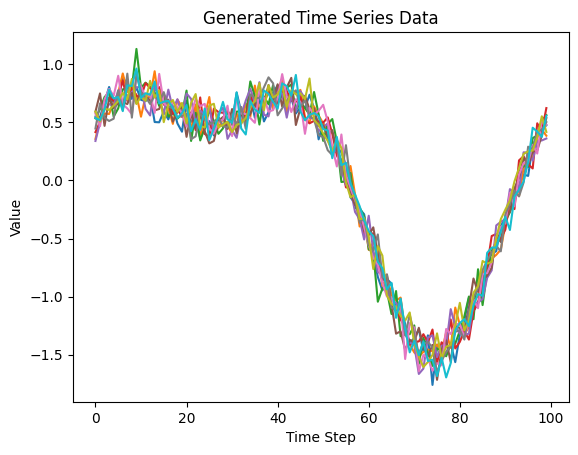

In [50]:
# 可视化生成的测试数据
plt.plot(data)
plt.title("Generated Time Series Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

In [49]:
# 奇异值分解
U, S, VT = np.linalg.svd(data, full_matrices=False)
S = np.diag(S)

# 选择要保留的奇异值个数
k = 3
U_k = U[:, :k]
S_k = S[:k, :k]
VT_k = VT[:k, :]

In [51]:
# 重构数据
data_reconstructed = np.dot(U_k, np.dot(S_k, VT_k))

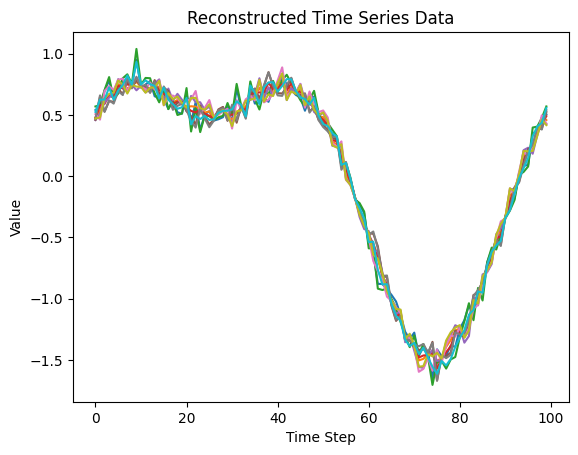

In [52]:
# 可视化重构后的数据
plt.plot(data_reconstructed)
plt.title("Reconstructed Time Series Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

In [53]:
# 假设时间序列的未来趋势与最近的趋势相似
# 预测下一个时间步
next_time_step = VT_k[:, -1] + np.mean(np.diff(VT_k, axis=1), axis=1)
predicted_next_value = np.dot(U_k, np.dot(S_k, next_time_step))


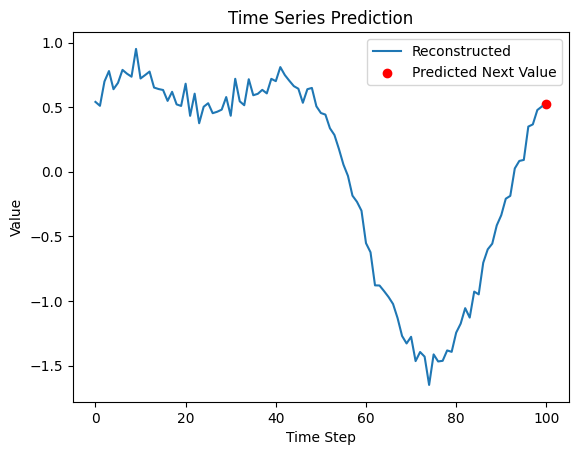

In [54]:
# 可视化预测结果
plt.plot(np.arange(num_time_steps), data_reconstructed[:, 0], label="Reconstructed")
plt.scatter(num_time_steps, predicted_next_value[0], color='red', label="Predicted Next Value")
plt.title("Time Series Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

### 1.8.4 基于高斯过程的时间序列预测方法

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [57]:
# 生成测试数据
def generate_time_series_data(n_points=100):
    np.random.seed(42)
    X = np.atleast_2d(np.linspace(0, 10, n_points)).T
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
    return X, y

X, y = generate_time_series_data()

In [58]:
# 定义高斯过程的核函数
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# 实例化高斯过程回归器
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [59]:
# 训练模型
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [60]:
# 进行预测
X_pred = np.atleast_2d(np.linspace(0, 15, 1000)).T
y_pred, sigma = gp.predict(X_pred, return_std=True)


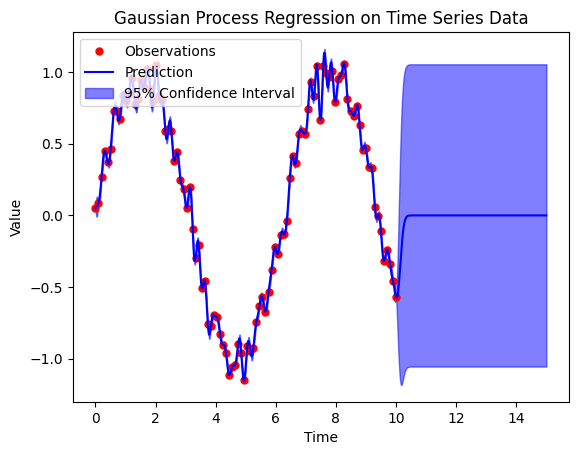

In [61]:
# 绘制结果
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, color='blue', label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process Regression on Time Series Data')
plt.legend(loc='upper left')

plt.show()